# Varying block size plotting scripts

In [19]:
# Import necessary libraries 
import matplotlib.pyplot as plt
from numpy import percentile

In [37]:
ROOT="/run/media/haxolotl/Backup/GitRoot/libapollo-rust"
# data_file = f"{ROOT}/data/May04/t2med/varyb"
# data_file = f"{ROOT}/data/May04/c5-4xlarge/varyb"
# data_file = f"{ROOT}/data/May05/parity/varyb"
data_file = f"{ROOT}/data/May05/t2med-local/varyb"
Protocols = ["artemis","apollo","optsync"]
Blocksizes = [100,400,800,1600,3200]
Markers = {
    "artemis": "+",
    "apollo": "o",
    "optsync": "x",
}
Name = {
    "artemis": "Artemis",
    "apollo": "Apollo",
    "optsync": "Opt Sync"
}

In [52]:
data = {}
for p in Protocols:
    data[p] = {}

# Process the given log_file
def process_log_file(log_file:str, log_data={"w":[],"tput":[],"lat":[]}):
    with open(log_file, "r") as f:
        for line in f.readlines():
            if line.count("DP[Window]: ") > 0:
                window = int(line.split("DP[Window]: ")[1].strip())
                log_data["w"].append(window/1000)
            if line.count("DP[Throughput]: ") > 0:
                tput = float(line.split("DP[Throughput]: ")[1].strip())
                log_data["tput"].append(tput/1000)
            if line.count("DP[Latency]: ") > 0:
                lat = float(line.split("DP[Latency]: ")[1].strip())
                log_data["lat"].append(lat)

# Function to add data to the dictionary
def add_data(Protocol:str, Blocksize:int, in_data={}):
    # Reset stale data
    if Protocol not in in_data.keys():
        in_data[Protocol] = {}
    # Overwrite whatever stale blocksize data was there, with a new one
    in_data[Protocol][Blocksize] = {
        "w": [],
        "tput": [],
        "lat": []
    }
    # Process the file
    log_file = f"{data_file}/b{Blocksize}-{Protocol}-run.log"
    log_data = process_log_file(log_file, in_data[Protocol][Blocksize])

for p in Protocols:
    for b in Blocksizes:
        add_data(p,b,data)

import json 
with open(f"{data_file}/processed.json","w") as f:
    json.dump(data, f, indent=4)
# print(data["synchs"])

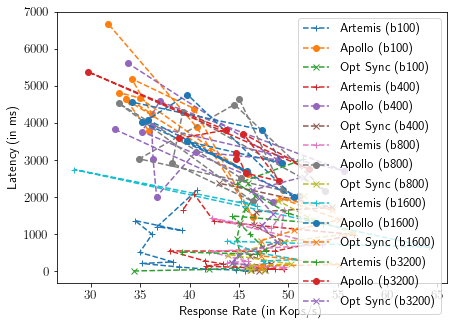

In [45]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(7, 5)
plt.rcParams.update({'font.size': 13})

# Protocols=["artemis"]

for b in Blocksizes:
    for p in Protocols:
         plt.plot(data[p][b]["tput"],data[p][b]["lat"], label=f"{Name[p]} (b{b})", linestyle='--', marker=Markers[p])

plt.legend()
plt.xlabel("Response Rate (in Kops/s)")
plt.ylabel("Latency (in ms)")
# plt.show()
plt.savefig(f"{ROOT}/Plots/t2med-local/tput-vs-lat.pdf", bbox_inches="tight")

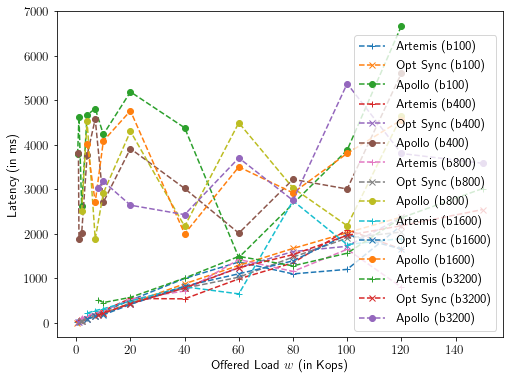

In [59]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(8, 6)
plt.rcParams.update({'font.size': 13})

for b in [100,400,800,1600,3200]:
    for p in ["artemis","optsync","apollo"]:
         plt.plot(data[p][b]["w"],data[p][b]["lat"], label=f"{Name[p]} (b{b})", linestyle='--', marker=Markers[p])

plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Latency (in ms)")
# plt.show()
plt.savefig(f"{ROOT}/Plots/t2med-local/lat-vs-w.pdf", bbox_inches="tight")

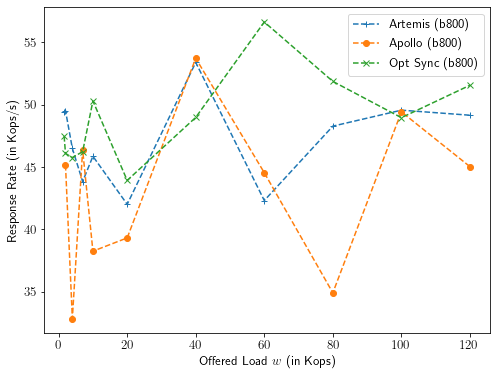

In [62]:
plt.rc('text',usetex=True)

# plt.rcParams["figure.figsize"] =(6.6, 4)
plt.rcParams.update({'font.size': 13})

for b in [800]:
    for p in Protocols:
         plt.plot(data[p][b]["w"],data[p][b]["tput"], label=f"{Name[p]} (b{b})", linestyle='--', marker=Markers[p])

plt.legend()
plt.xlabel("Offered Load $w$ (in Kops)")
plt.ylabel("Response Rate (in Kops/s)")
# plt.show()
plt.savefig(f"{ROOT}/Plots/t2med-local/tput-vs-w.pdf", bbox_inches="tight")

In [45]:
%%bash
# Export to the overleaf document
cd "/run/media/haxolotl/Backup/GitRoot/libapollo-rust"


0.log
1.log
2.log
benches
Cargo.lock
Cargo.toml
client.log
cli_ip_file
config
consensus
crypto
data
examples
ip_file
logs.txt
Makefile
net
perf.data
perf.data.old
Plots
scripts
src
target
testdata
TODO.md
tools
types
util


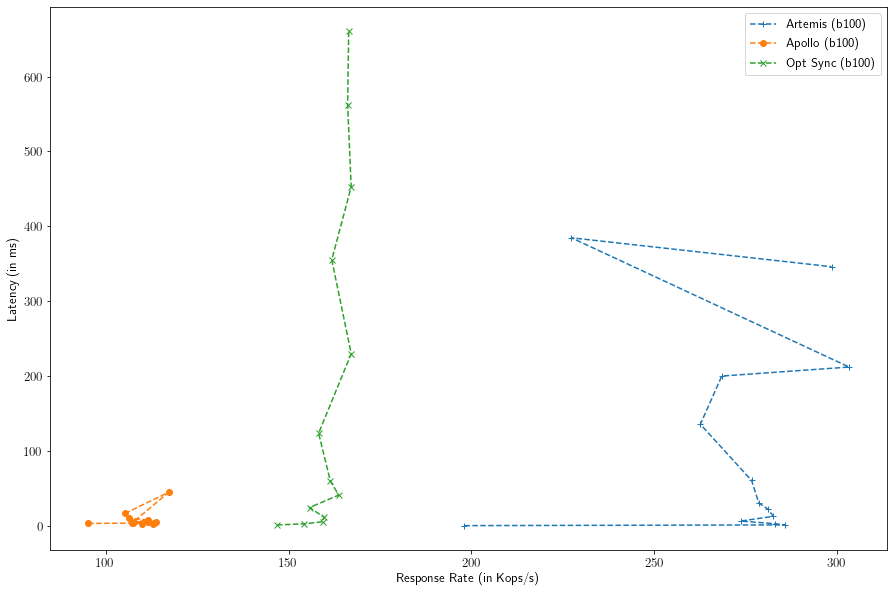

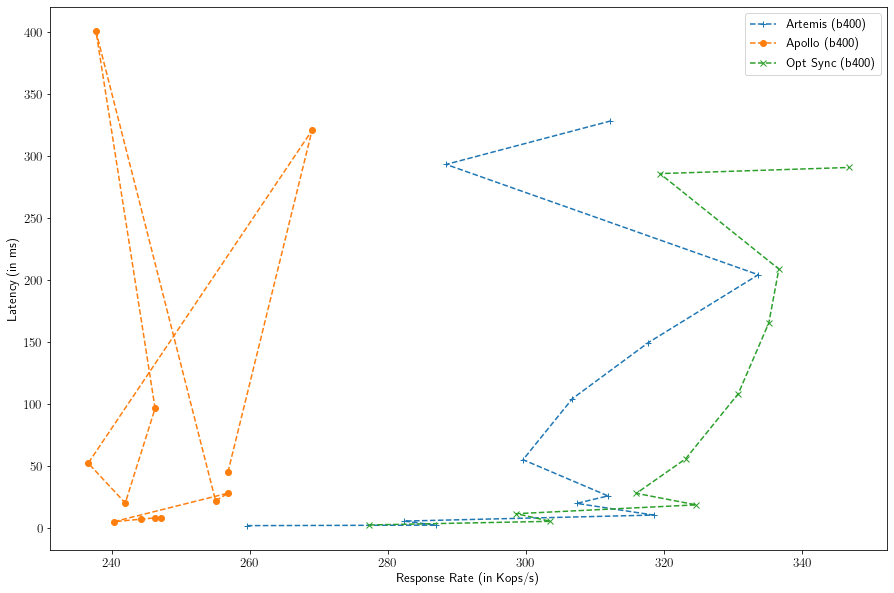

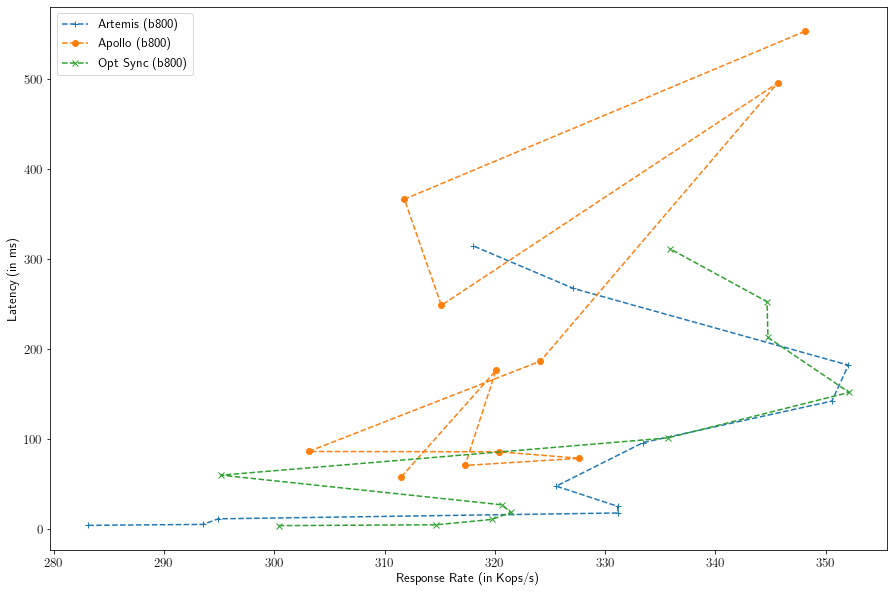

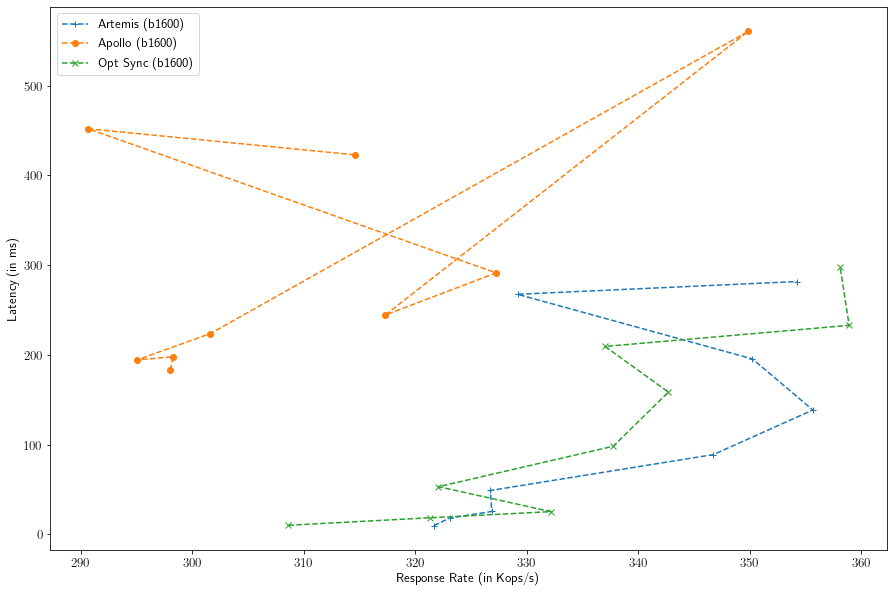

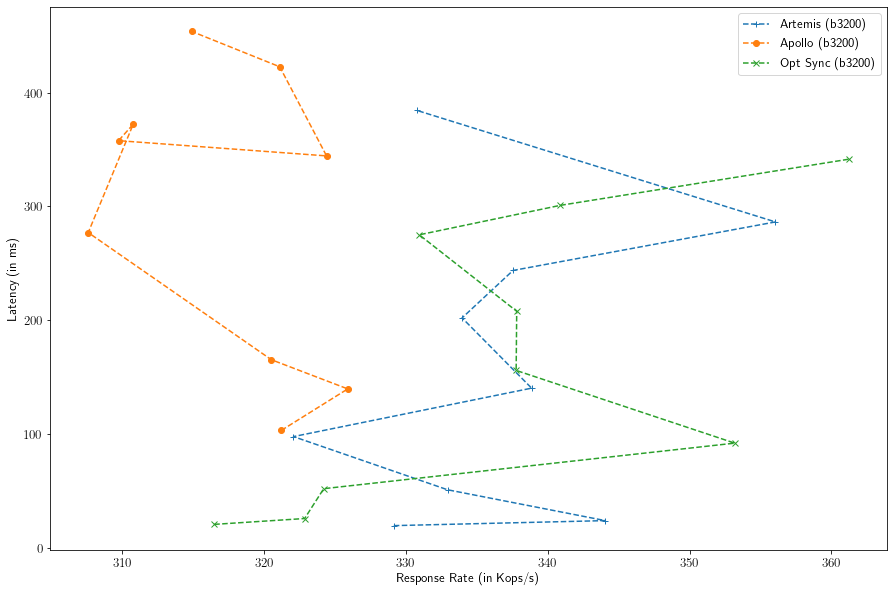

<Figure size 1080x720 with 0 Axes>

In [15]:
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(15, 10)
plt.rcParams.update({'font.size': 13})

for b in Blocksizes:
    for p in Protocols:
         plt.plot(data[p][b]["tput"],data[p][b]["lat"], label=f"{Name[p]} (b{b})", linestyle='--', marker=Markers[p])

    plt.legend()
    plt.xlabel("Response Rate (in Kops/s)")
    plt.ylabel("Latency (in ms)")
    plt.show()
#     plt.savefig(f"t2med-b{b}.pdf", bbox_inches="tight")
    plt.clf()

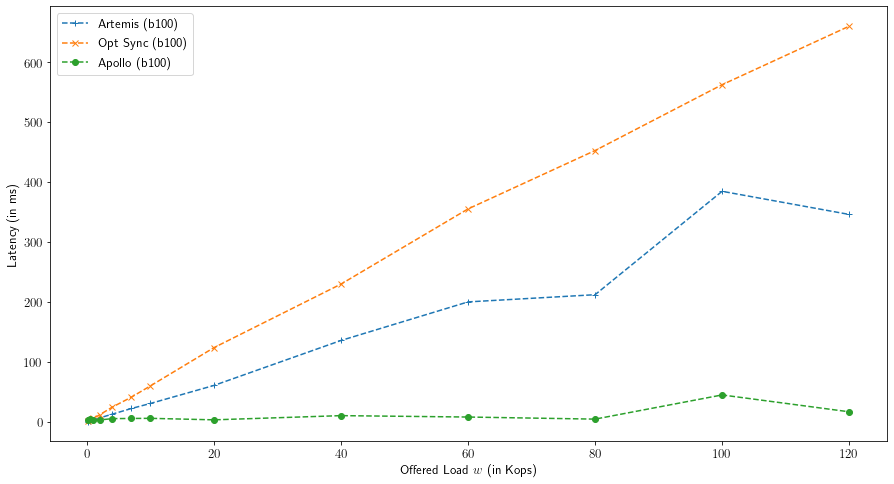

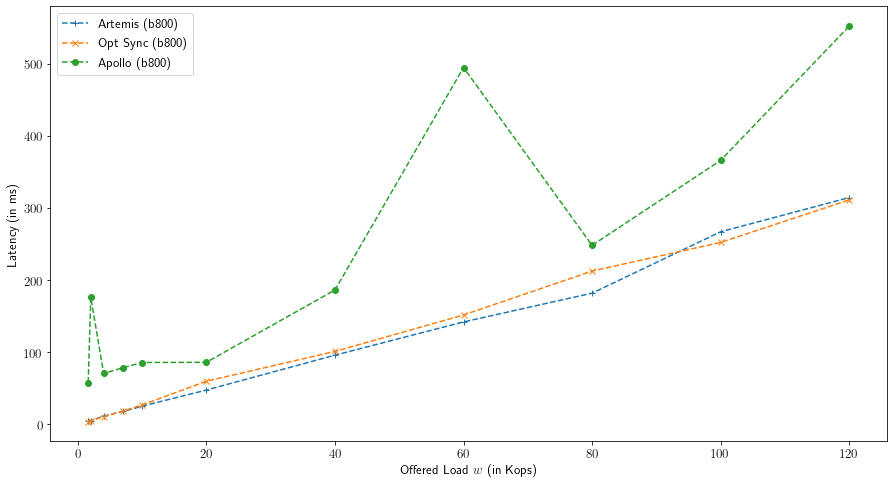

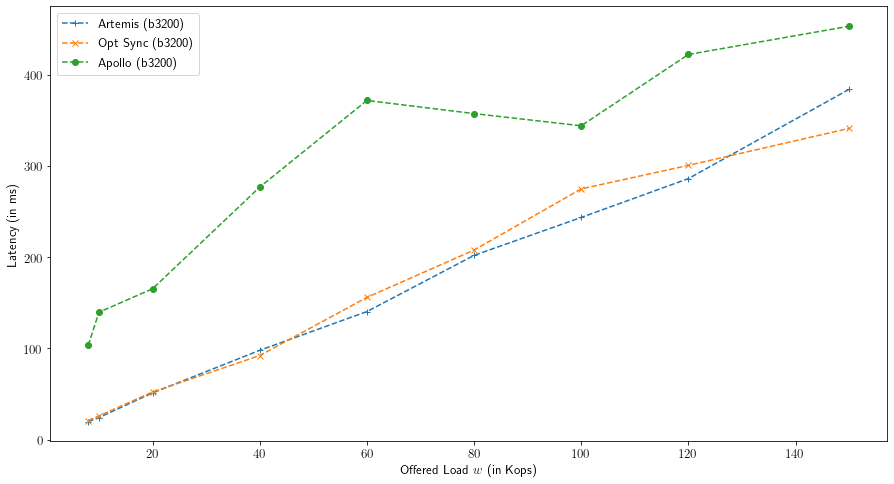

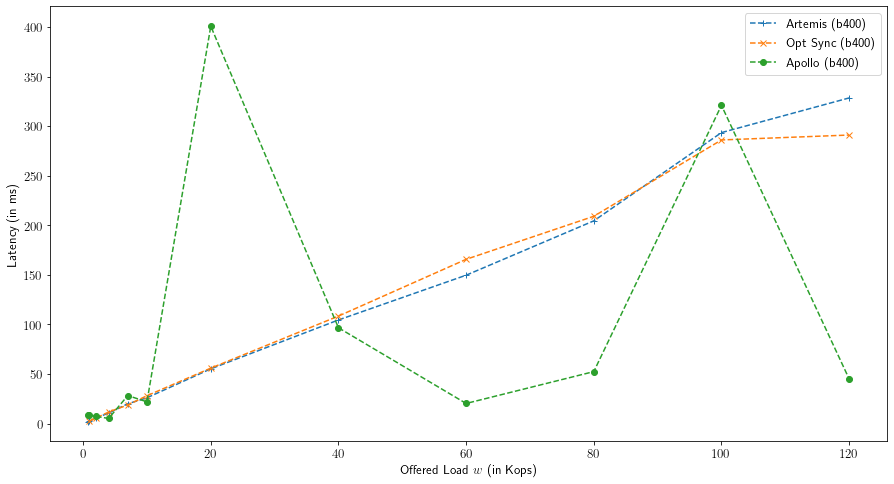

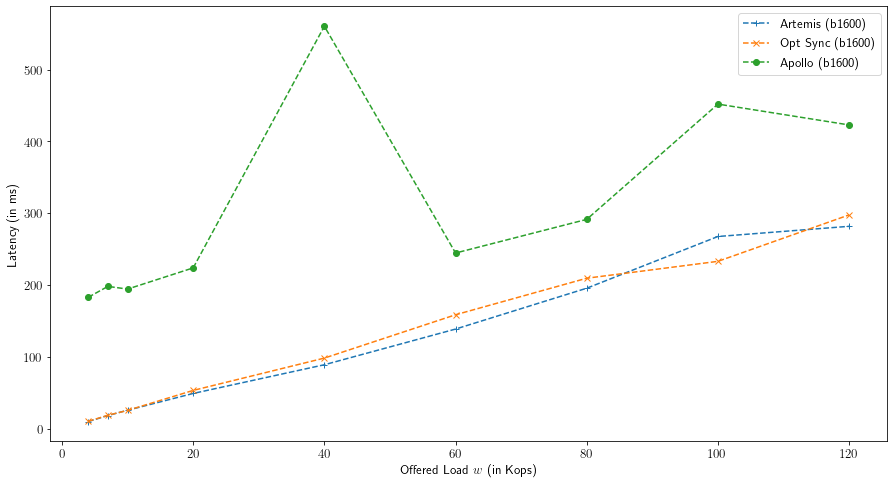

<Figure size 1080x576 with 0 Axes>

In [17]:
# Start from here
plt.rc('text',usetex=True)

plt.rcParams["figure.figsize"] =(15, 8)
plt.rcParams.update({'font.size': 13})

for b in [100,800,3200,400,1600]:
    for p in ["artemis","optsync","apollo"]:
         plt.plot(data[p][b]["w"],data[p][b]["lat"], label=f"{Name[p]} (b{b})", linestyle='--', marker=Markers[p])

    plt.legend()
    plt.xlabel("Offered Load $w$ (in Kops)")
    plt.ylabel("Latency (in ms)")
    plt.show()
#     plt.savefig(f"c54xlarge-lat-vs-w-b{b}.pdf", bbox_inches="tight")
    plt.clf()

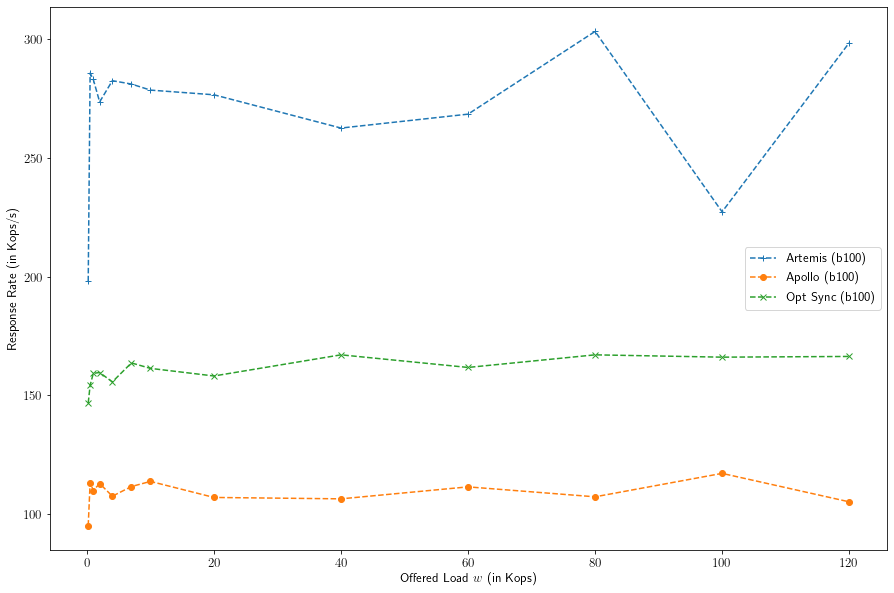

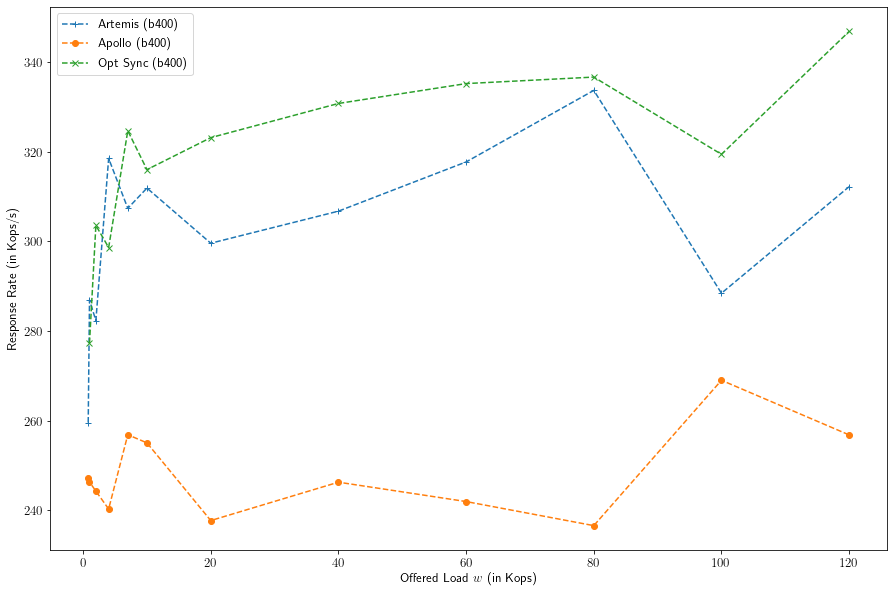

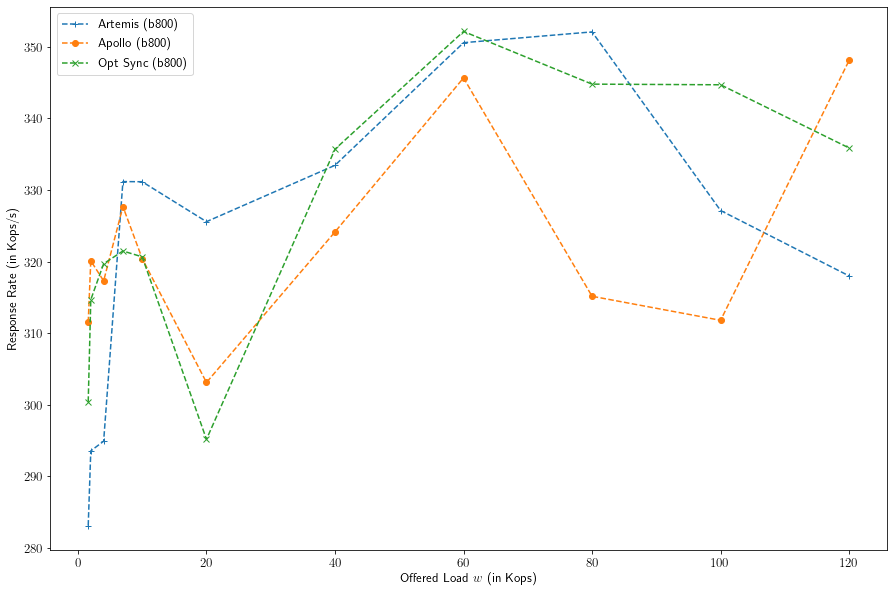

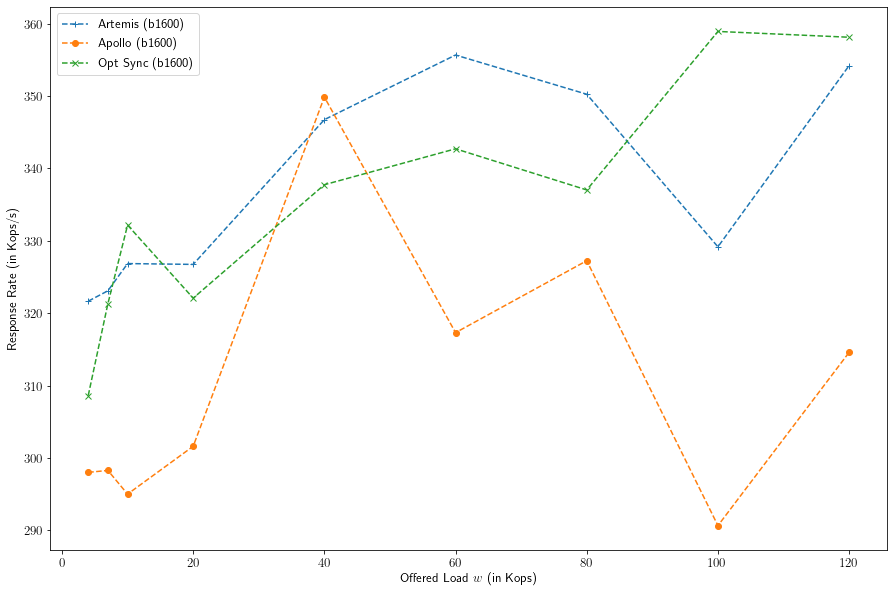

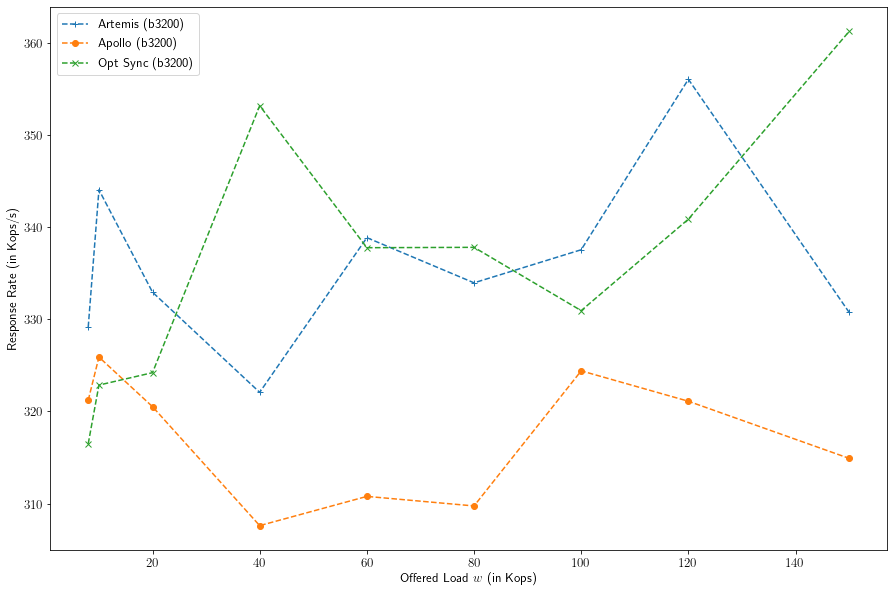

<Figure size 1080x720 with 0 Axes>

In [16]:
plt.rc('text',usetex=True)

# plt.rcParams["figure.figsize"] =(6.6, 4)
plt.rcParams.update({'font.size': 13})

for b in Blocksizes:
    for p in Protocols:
         plt.plot(data[p][b]["w"],data[p][b]["tput"], label=f"{Name[p]} (b{b})", linestyle='--', marker=Markers[p])

    plt.legend()
    plt.xlabel("Offered Load $w$ (in Kops)")
    plt.ylabel("Response Rate (in Kops/s)")
    plt.show()
#     plt.savefig(f"t2med-tput-vs-w-b{b}.pdf", bbox_inches="tight") 
    plt.clf() 